IE 7275 - Data Visualization

# 1 - Installing Required Packages

In [ ]:
pip install mapclassify

In [ ]:
pip install geoplot

     |████████████████████████████████| 10.8 MB 17.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 45.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 72.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 73.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 46.9 MB/s 
     |████████████████████████████████| 19.3 MB 539 kB/s 
     |████████████████████████████████| 6.3 MB 54.2 MB/s 
     |████████████████████████████████| 16.7 MB 53.0 MB/s 
     |████████████████████████████████| 44 kB 1.9 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64

In [ ]:
pip install geopandas

# 2 - Importing Essential Libraries

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd
import geoplot
from google.colab import files
import csv 
import plotly.express as px

# 3 - Importing Preprocessed Files

In [ ]:
#Import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv ("F1Data.csv") 
df.head()

Saving F1Data.csv to F1Data.csv


,Unnamed: 0,season,round,circuit_id,country,driver,nationality,constructor,podium,driver_points,driver_wins,driver_position,constructor_points,constructor_wins,constructor_position,driver_age
0,0,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
1,1,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
2,2,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
3,3,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32
4,4,2012,1,albert_park,Australia,button,British,mclaren,1,25,1,1,0,0,0,32


In [ ]:
file = files.upload()  #upload file into google colab session
constructors = pd.read_csv ("constructors.csv") 
constructors.head()

Saving constructors.csv to constructors.csv


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


# 4 - Feature Correlation Matrix

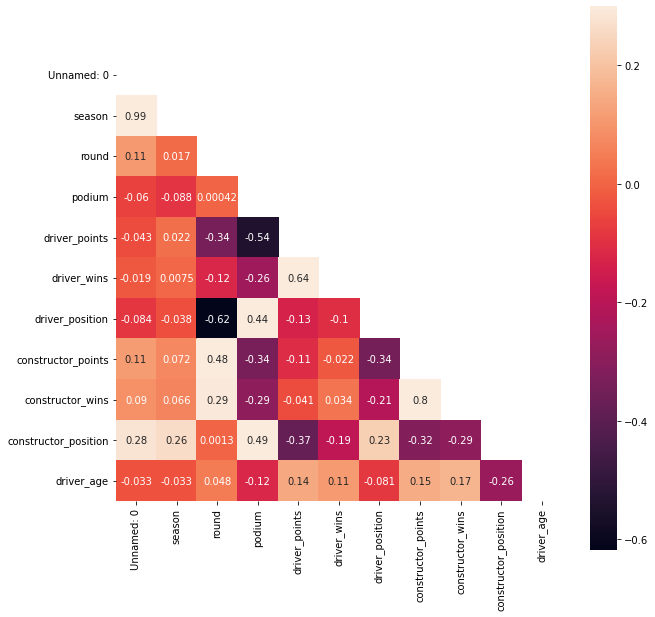

In [ ]:
#Feature correlation matrix
plt.subplots(figsize=(10,10))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
plt.show()

# 5 - Geomap/Choropleth Showing Countries with Circuits

a - Preprocessing to acquire necessary metadata

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['name'] = world['name'].apply(lambda x: 'UAE' if x == 'United Arab Emirates' else 'UK' if x == 'United Kingdom' else 'USA' if x == 'United States of America' else 'Korea' if x == 'South Korea' else x)
df2 = df.copy()
df2 = df2.merge(world[['continent', 'name', 'iso_a3', 'geometry']], left_on='country', right_on='name', how='left')
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")).drop(['pop_est', 'gdp_md_est'], axis=1)
df2= df2[countries.columns].drop_duplicates().dropna()

df3 = df.copy().groupby('country').size()
world['count'] = world['name'].apply(lambda x: df3[x] if x in df3 else 0)

b - Plotting geomap

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


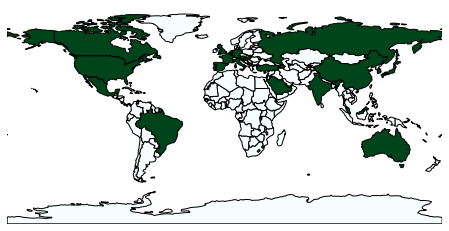

In [ ]:
import mapclassify
world_count = world['count']
scheme = mapclassify.Quantiles(world_count, k=2)

geoplot.choropleth(
    world, hue=world_count, scheme=scheme,
    cmap='BuGn', figsize=(8, 4))

# 6 - Line Graph of Races Held Each Year

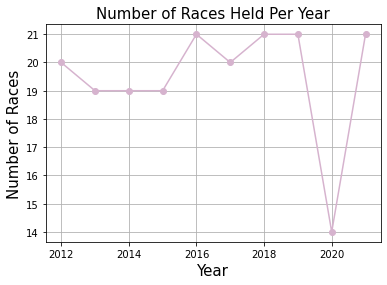

In [ ]:
df4 = df.copy()
df4 = df4[['season', 'circuit_id']].drop_duplicates()
count_races = df4.groupby('season').size()
years = df4['season'].unique()
plt.plot(years, count_races, color='#d6b3ce', marker='o')
plt.title('Number of Races Held Per Year', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Races', fontsize=15)
plt.grid(True)
plt.show()

# 7 - Tree map of Countries Represented by Constructors

In [ ]:
df5 = constructors.groupby(["nationality"]).apply(lambda x: x.sort_values(["name"], ascending = False)).reset_index(drop=True)
GF500 = df5.groupby('nationality').head(5)

fig = px.treemap(GF500, path=[px.Constant("World"), 'nationality', 'name'], title="Countries Represented by Constructors")
fig.update_traces(root_color="honeydew")
fig.update_layout(treemapcolorway = px.colors.qualitative.Pastel, margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# 8 - Scatter Plot of Driver Ages for Each Year

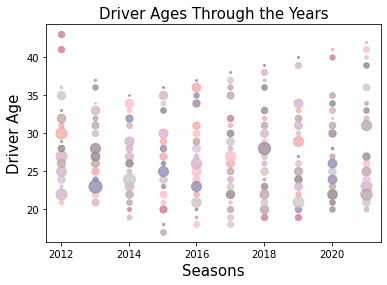

In [ ]:
df5 = df.copy()
df5 = df5[['season', 'driver_age']]
df5 = df5.groupby(['season', 'driver_age'], as_index=False).size()
sizes = df5['size'].unique()
colors = ["#e0c1d9", "#d6b3ce", "#c0a8ab", "#ca7e9a", "#958cb4", "#a18aa0", "#f2acaa", "#928a88", "#c0a8aa", "#ccc8c7", "#d6b3ce", "pink"]
for size in sizes:
  temp_df = df5.copy()
  temp_df = temp_df[temp_df['size']==size]
  color = colors[size%12]
  plt.scatter(temp_df['season'], temp_df['driver_age'], s=size, c=color, alpha=0.8)
plt.title("Driver Ages Through the Years", fontsize=15)
plt.xlabel("Seasons", fontsize=15)
plt.ylabel("Driver Age", fontsize=15)
plt.show()